## **Data Question 1: An Exploration of UN data**
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.


 1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.


3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook.


In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
    * Take a look at the first 10 rows. 
    * Look at the last 5 rows. Do you see a problem?
    * Redo the read_csv() call to correct this issue - **do not** modify the original csv file.


In [2]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
...,...,...,...,...
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN


gdp_df

In [3]:
gdp_df[0:10]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [4]:
gdp_df.iloc[-5:]

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


# Problem - last 2 rows need to be removed

In [5]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv", skipfooter=2, engine='python')
gdp_df.iloc[-5:]

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [7]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'], axis=1)

In [8]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [9]:
gdp_df.shape

(6868, 3)

In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [11]:
gdp_df = gdp_df.astype({"Country": "category"})

In [12]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country         6868 non-null   category
 1   Year            6868 non-null   int64   
 2   GDP_Per_Capita  6868 non-null   float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 130.8 KB


In [13]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [14]:
gdp_df["Year"].value_counts().sort_index()

1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [15]:
gdp_df["Country"].value_counts()

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [16]:
gdp_df["Country"].value_counts().head(10)

Lebanon          30
Middle income    30
Morocco          30
Mozambique       30
Myanmar          30
Namibia          30
Nepal            30
Netherlands      30
New Zealand      30
Nicaragua        30
Name: Country, dtype: int64

In [17]:
gdp_df["Country"].value_counts().tail(10)

CuraÃ§ao                     20
Qatar                        20
Palau                        20
SÃ£o TomÃ© and Principe      19
Afghanistan                  18
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, dtype: int64

9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [18]:
gdp_2014 = gdp_df.loc[gdp_df["Year"] == 2014]

In [19]:
gdp_2014

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470
...,...,...,...
6727,Vietnam,2014,6098.489609
6757,West Bank and Gaza,2014,5967.073437
6783,World,2014,15189.648507
6813,Zambia,2014,3450.046561


10. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [20]:
gdp_2014["GDP_Per_Capita"].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

Observations:

    * ...

11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

<AxesSubplot:>

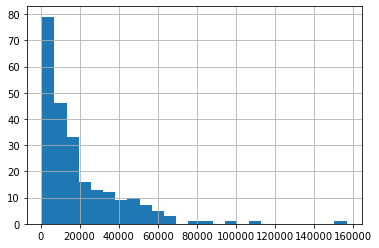

In [21]:
gdp_2014["GDP_Per_Capita"].hist(bins=25)

The shape of the distribution...

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [22]:
gdp_2014.sort_values("GDP_Per_Capita").head(5)

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


In [23]:
gdp_2014.sort_values("GDP_Per_Capita", ascending = False).head(5)

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [24]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named `gdp_pivoted`.

In [25]:
gdp_pivoted = (
    gdp_df
    .loc[gdp_df['Year'].isin([1990, 2017])]
    .pivot_table(values = 'GDP_Per_Capita',
                  index = 'Country',
                  columns = 'Year')
    .dropna()
)

14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.



In [26]:
gdp_pivoted['Percent_Change']=100*(gdp_pivoted[2017] - gdp_pivoted[1990])/gdp_pivoted[1990]

In [27]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4842.734635,12811.759436,164.556297
Algeria,8746.352901,11737.409353,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551675,19840.076123,28.335391
Arab World,9694.667544,14555.474921,50.138980
...,...,...,...
Vanuatu,2888.309393,3116.645194,7.905517
Vietnam,1673.249634,7155.745829,327.655604
World,9680.269697,16253.385518,67.902197


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [28]:
gdp_pivoted[gdp_pivoted['Percent_Change']<0].shape[0]

17

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.


In [29]:
gdp_pivoted.sort_values(by= "Percent_Change", ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,2068.404561
China,1423.896348,14344.421239,907.406281
Myanmar,619.645144,4739.910118,664.939443
East Asia & Pacific (excluding high income),2173.223895,12986.322227,497.560254
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,497.334945
...,...,...,...
Central African Republic,1201.677234,912.802052,-24.039332
Ukraine,15751.722440,11871.123624,-24.636028
Burundi,1184.842440,773.571858,-34.710993


<AxesSubplot:xlabel='Year'>

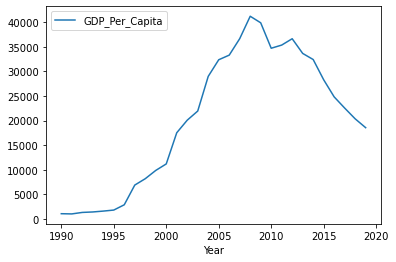

In [30]:
gdp_df[gdp_df['Country'] == 'Equatorial Guinea'].plot(x='Year', y='GDP_Per_Capita') 

<AxesSubplot:xlabel='Year'>

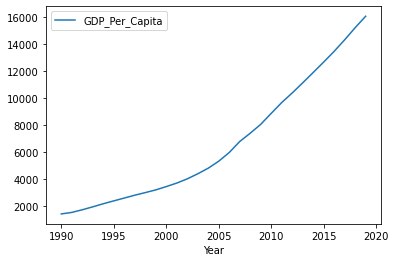

In [31]:
gdp_df[gdp_df['Country'] == 'China'].plot(x='Year', y='GDP_Per_Capita') 

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [32]:
top_pc = gdp_pivoted.nlargest(2, 'Percent_Change').index[0]
second_pc = gdp_pivoted.nlargest(2, 'Percent_Change').index[1]

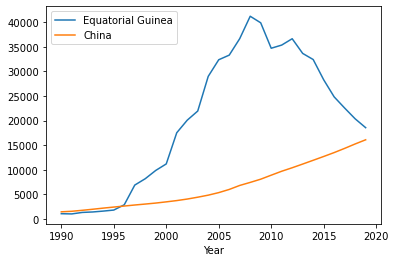

In [33]:
ax = gdp_df[gdp_df['Country'] == top_pc].plot(x = 'Year', y = 'GDP_Per_Capita', label = top_pc)
gdp_df[gdp_df['Country'] == second_pc].plot(x = 'Year',
                                            y = 'GDP_Per_Capita',
                                            label = second_pc,
                                           ax = ax);

In [34]:
continents = pd.read_csv("../data/continents.csv")

In [35]:
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [36]:
gdp_df = pd.merge(left = gdp_df, right = continents,
how='inner', on='Country')

In [37]:
gdp_df.shape

(5443, 4)

In [38]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


In [39]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5443 non-null   object 
 1   Year            5443 non-null   int64  
 2   GDP_Per_Capita  5443 non-null   float64
 3   Continent       5443 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB


In [40]:
gdp_df = gdp_df.astype({"Continent": "category"})

In [41]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country         5443 non-null   object  
 1   Year            5443 non-null   int64   
 2   GDP_Per_Capita  5443 non-null   float64 
 3   Continent       5443 non-null   category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 175.6+ KB


19. Determine the number of countries per continent. Create a bar chart showing this.

<AxesSubplot:>

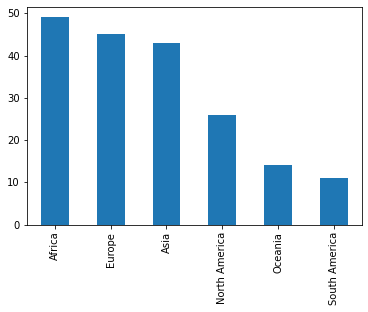

In [42]:
gdp_df.drop_duplicates(subset="Country")["Continent"].value_counts().plot(kind = "bar")

20. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

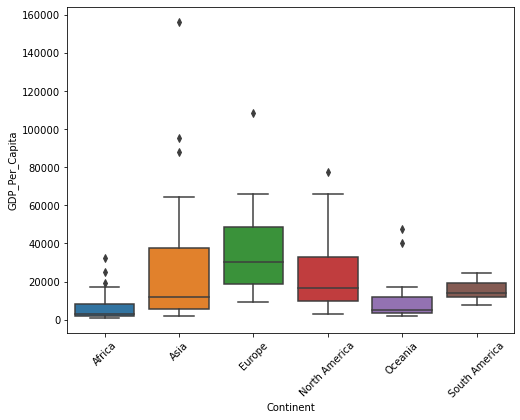

In [43]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = gdp_df[gdp_df["Year"] == 2014], x = "Continent", y = "GDP_Per_Capita", ax =ax)
plt.xticks(rotation = 45);

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`.

In [44]:
life_expectancy = pd.read_csv("../data/life_expectancy.csv", header=4, engine="python")

In [45]:
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.497561,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683,71.087805,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,66.181000,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,...,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,64.379000,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,64.194000,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use `.melt()` to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [46]:
life_expectancy = life_expectancy.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])

In [47]:
life_expectancy = life_expectancy.rename(columns = {"Country Name": "Country"})

In [48]:
life_expectancy = life_expectancy.melt(id_vars = "Country", var_name = "Year", value_name = "Life_Expectancy")
life_expectancy

,Country,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000
...,...,...,...
16487,Kosovo,2021,NaN
16488,"Yemen, Rep.",2021,NaN
16489,South Africa,2021,NaN
16490,Zambia,2021,NaN


23. What was the first country with a life expectancy to exceed 80?

In [49]:
life_expectancy[life_expectancy['Life_Expectancy'] > 80].sort_values("Year").head(1)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.200244


24. Merge `gdp_per_capita` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [50]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          16492 non-null  object 
 1   Year             16492 non-null  object 
 2   Life_Expectancy  14858 non-null  float64
dtypes: float64(1), object(2)
memory usage: 386.7+ KB


In [51]:
life_expectancy = life_expectancy.astype({"Country": "category", "Year": "int64"})

In [52]:
gdp_le = pd.merge(left = gdp_df, right = life_expectancy)
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377
...,...,...,...,...,...
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749


In [53]:
gdp_le = gdp_le.dropna()

In [54]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377
...,...,...,...,...,...
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749


In [55]:
gdp_le.tail()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749
5113,Zimbabwe,1990,3324.348171,Africa,58.100


In [56]:
gdp_le.shape

(4922, 5)

25. Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2019?

In [57]:
gdp_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 0 to 5113
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Country          4922 non-null   object  
 1   Year             4922 non-null   int64   
 2   GDP_Per_Capita   4922 non-null   float64 
 3   Continent        4922 non-null   category
 4   Life_Expectancy  4922 non-null   float64 
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 197.3+ KB


In [58]:
gdp_le = gdp_le.astype({"Country": "category", "Year": "int64"})


In [59]:
gdp_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 0 to 5113
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Country          4922 non-null   category
 1   Year             4922 non-null   int64   
 2   GDP_Per_Capita   4922 non-null   float64 
 3   Continent        4922 non-null   category
 4   Life_Expectancy  4922 non-null   float64 
dtypes: category(2), float64(2), int64(1)
memory usage: 173.9 KB


In [60]:
gdp_le_2019 = gdp_le[gdp_le["Year"]==2019]

In [61]:
gdp_le_2019

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
18,Albania,2019,13724.058790,Europe,78.573
48,Algeria,2019,11510.557088,Africa,76.880
78,Angola,2019,6670.332297,Africa,61.147
108,Antigua and Barbuda,2019,21910.184985,North America,77.016
...,...,...,...,...,...
4968,Vanuatu,2019,3153.015168,Oceania,70.474
4998,Vietnam,2019,8041.178551,Asia,75.400
5028,West Bank and Gaza,2019,6219.960291,Asia,74.053
5054,Zambia,2019,3470.448801,Africa,63.886


In [62]:
(gdp_le_2019["Life_Expectancy"] >= 80).sum()

33

26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [80]:
top_3_gdp = gdp_le_2019.nlargest(3, 'GDP_Per_Capita')['Country'].to_list()
top_3_gdp


['Macao SAR, China', 'Luxembourg', 'Singapore']

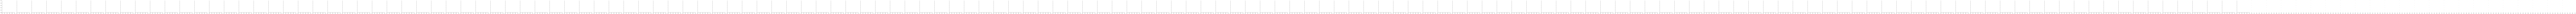

In [134]:
g = sns.FacetGrid(data = gdp_le[gdp_le["Country"].isin(top_3_gdp)], col = "Country")


In [135]:
g.map(sns.scatterplot, "Year", "Life_Expectancy")

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

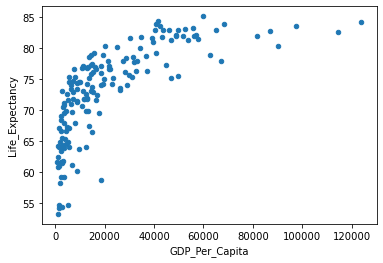

In [65]:
gdp_le_2019.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

In [66]:
gdp_le_2019[['GDP_Per_Capita', 'Life_Expectancy']].corr()

,GDP_Per_Capita,Life_Expectancy
GDP_Per_Capita,1.000000,0.709018
Life_Expectancy,0.709018,1.000000


29. Add a column to `gdp_le_2019` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [67]:
gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])

C:\Users\hpunc\AppData\Local\Temp\ipykernel_15072\2740929984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])


In [68]:
gdp_le_2019

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log_gdp
0,Afghanistan,2019,2065.036398,Asia,64.833,7.632903
18,Albania,2019,13724.058790,Europe,78.573,9.526906
48,Algeria,2019,11510.557088,Africa,76.880,9.351020
78,Angola,2019,6670.332297,Africa,61.147,8.805425
108,Antigua and Barbuda,2019,21910.184985,North America,77.016,9.994707
...,...,...,...,...,...,...
4968,Vanuatu,2019,3153.015168,Oceania,70.474,8.056114
4998,Vietnam,2019,8041.178551,Asia,75.400,8.992331
5028,West Bank and Gaza,2019,6219.960291,Asia,74.053,8.735519
5054,Zambia,2019,3470.448801,Africa,63.886,8.152039


In [69]:
gdp_le_2019.corr()

,Year,GDP_Per_Capita,Life_Expectancy,log_gdp
Year,NaN,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.709018,0.851629
Life_Expectancy,NaN,0.709018,1.000000,0.848498
log_gdp,NaN,0.851629,0.848498,1.000000


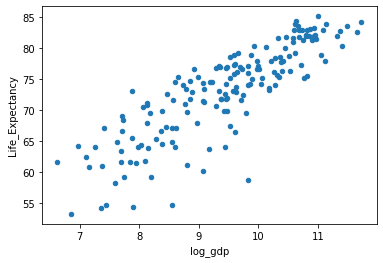

In [70]:
gdp_le_2019.plot(kind = 'scatter', x = 'log_gdp', y = 'Life_Expectancy');